In [59]:
import pandas as pd

In [60]:
train_df = pd.read_csv('C:/project/physionet2012/preprocessed_train_data.csv', encoding='cp949')
valid_df = pd.read_csv('C:/project/physionet2012/preprocessed_valid_data.csv', encoding='cp949')
test_df = pd.read_csv('C:/project/physionet2012/preprocessed_test_data.csv', encoding='cp949')

In [260]:
train_X = train_df.iloc[:,:-1]
train_y = train_df.iloc[:,-1]
valid_X = valid_df.iloc[:,:-1]
valid_y = valid_df.iloc[:,-1]
test_X = test_df.iloc[:,:-1]
test_y = test_df.iloc[:,-1]

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


c:\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [75]:
df = train_df

In [76]:
tar = df.iloc[:,-1]

In [77]:
df1 = df.iloc[:,:1]

In [78]:
df2 = pd.concat([df1,tar], axis=1)

In [80]:
df3 = df.iloc[:,2:]

In [81]:
df4 = pd.concat([df2,df3], axis=1)

In [82]:
df5 = pd.concat([df4,tar], axis=1)

In [83]:
df5

,pid,target,ICU-1,ICU-2,ICU-3,ICU-4,male,female,rec_time,age,...,RR,SPO2,BT,Urine,MechVent,SBP,DBP,MBP,target,target
0,132540,0.0,0,1,0,0,0,1,0.503994,0.844444,...,0.487179,0.97,0.923205,0.004091,1.0,0.447458,0.223881,0.280000,0.0,0.0
1,132540,0.0,0,1,0,0,0,1,0.509205,0.844444,...,0.487179,0.97,0.923205,0.006364,1.0,0.420339,0.212687,0.266667,0.0,0.0
2,132540,0.0,0,1,0,0,0,1,0.712400,0.844444,...,0.487179,0.97,0.911519,0.006364,1.0,0.406780,0.220149,0.266667,0.0,0.0
3,132540,0.0,0,1,0,0,0,1,0.733241,0.844444,...,0.487179,0.97,0.911519,0.022727,1.0,0.400000,0.223881,0.266667,0.0,0.0
4,132540,0.0,0,1,0,0,0,1,0.754081,0.844444,...,0.487179,0.97,0.909850,0.006364,1.0,0.372881,0.201493,0.233333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224975,142671,1.0,0,0,1,0,0,1,0.143105,0.411111,...,0.487179,0.97,0.928214,0.001091,1.0,0.600000,0.361940,0.396667,1.0,1.0
224976,142671,1.0,0,0,1,0,0,1,0.153526,0.411111,...,0.487179,0.97,0.928214,0.006364,1.0,0.566102,0.339552,0.376667,1.0,1.0
224977,142671,1.0,0,0,1,0,0,1,0.169156,0.411111,...,0.487179,0.97,0.928214,0.006364,1.0,0.613559,0.361940,0.403333,1.0,1.0
224978,142671,1.0,0,0,1,0,0,1,0.184786,0.411111,...,0.487179,0.97,0.949917,0.000545,1.0,0.644068,0.376866,0.420000,1.0,1.0


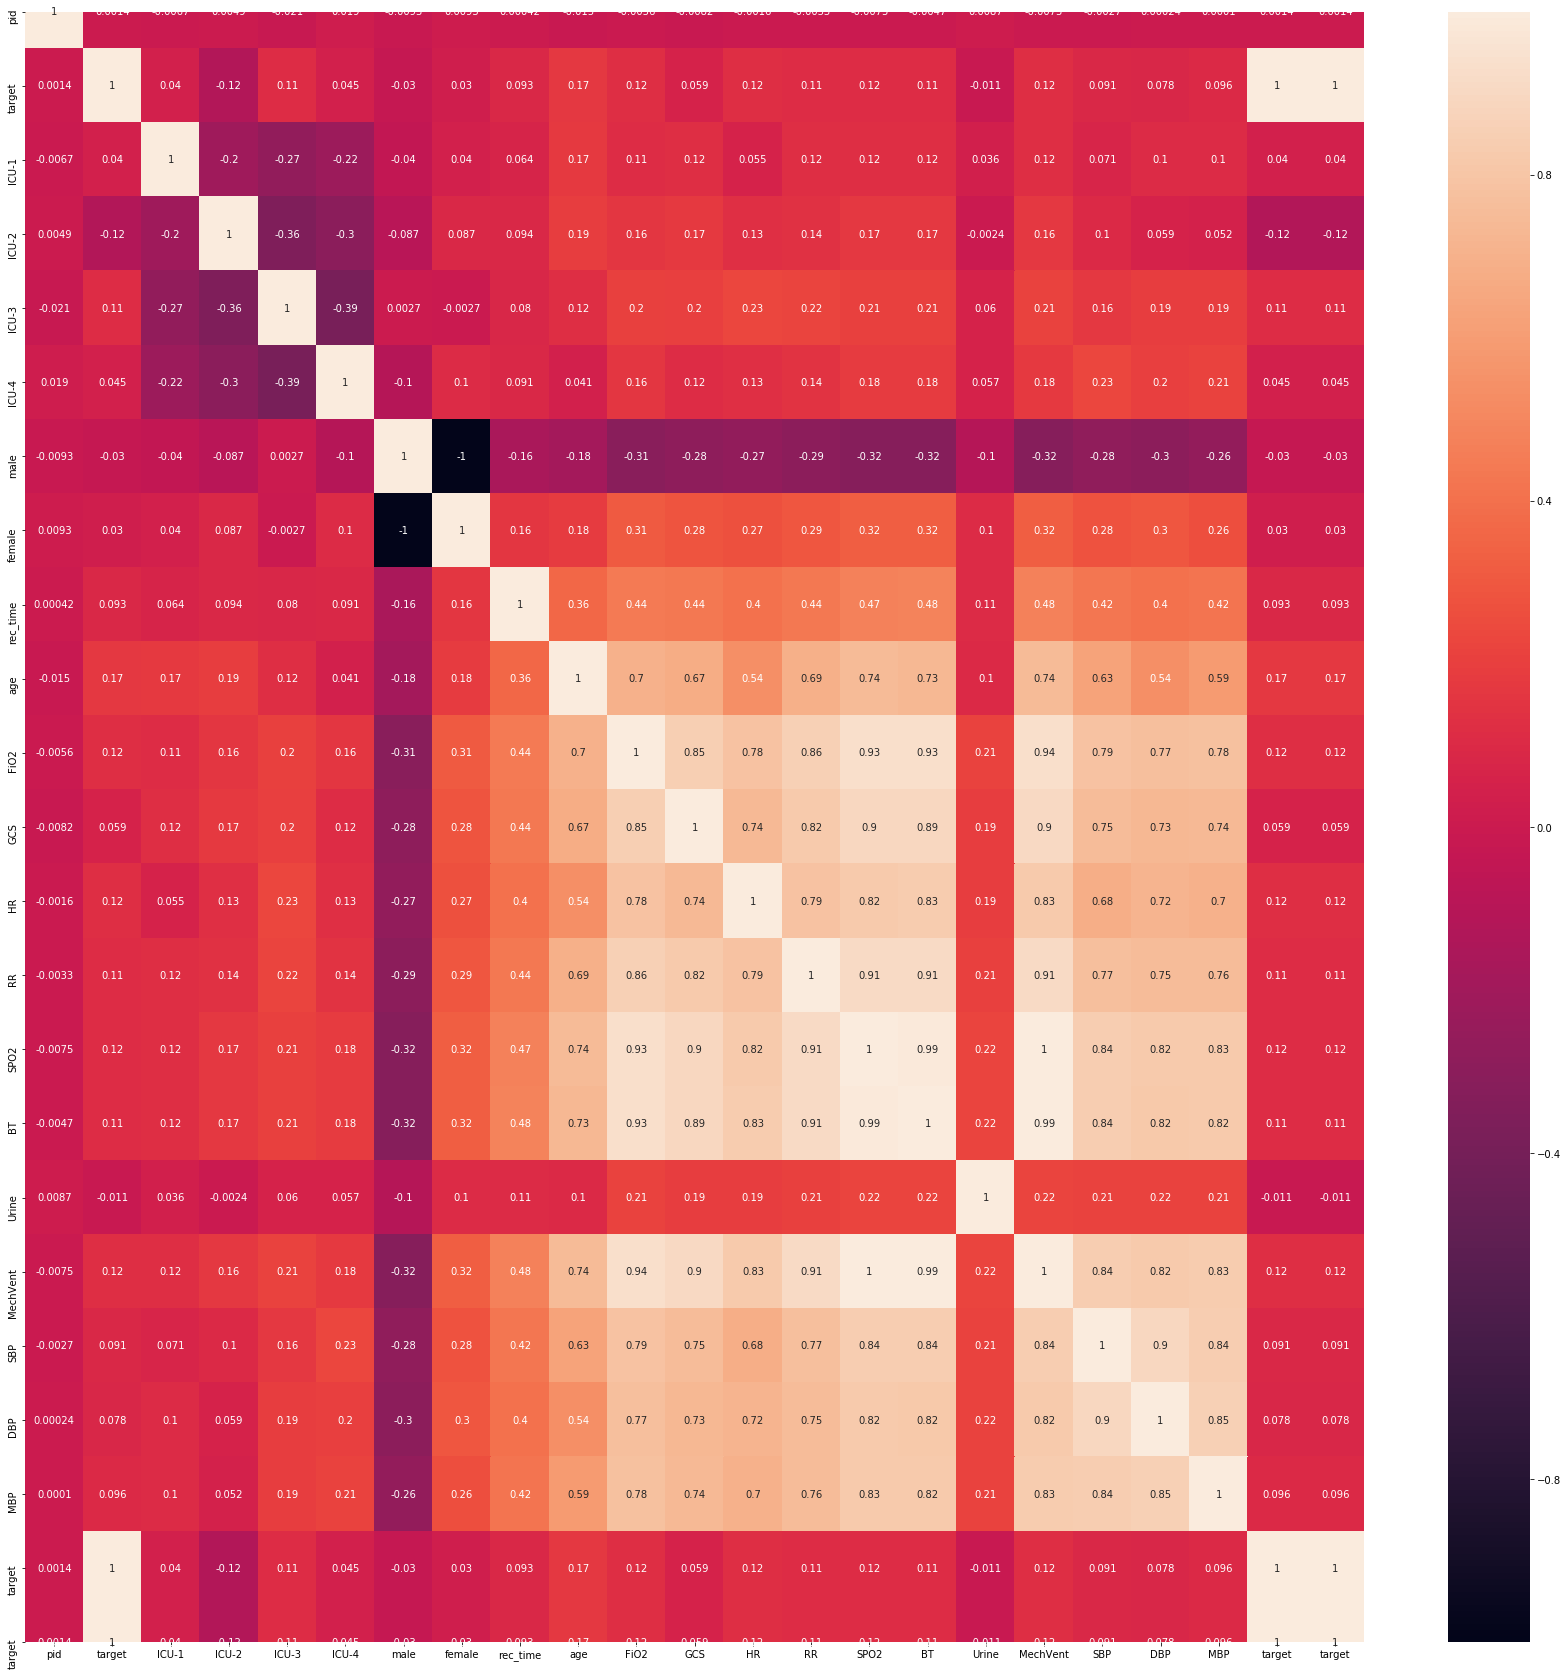

In [84]:
# train
plt.figure(figsize=(30,30))
sns.heatmap(df5.corr(), annot=True)

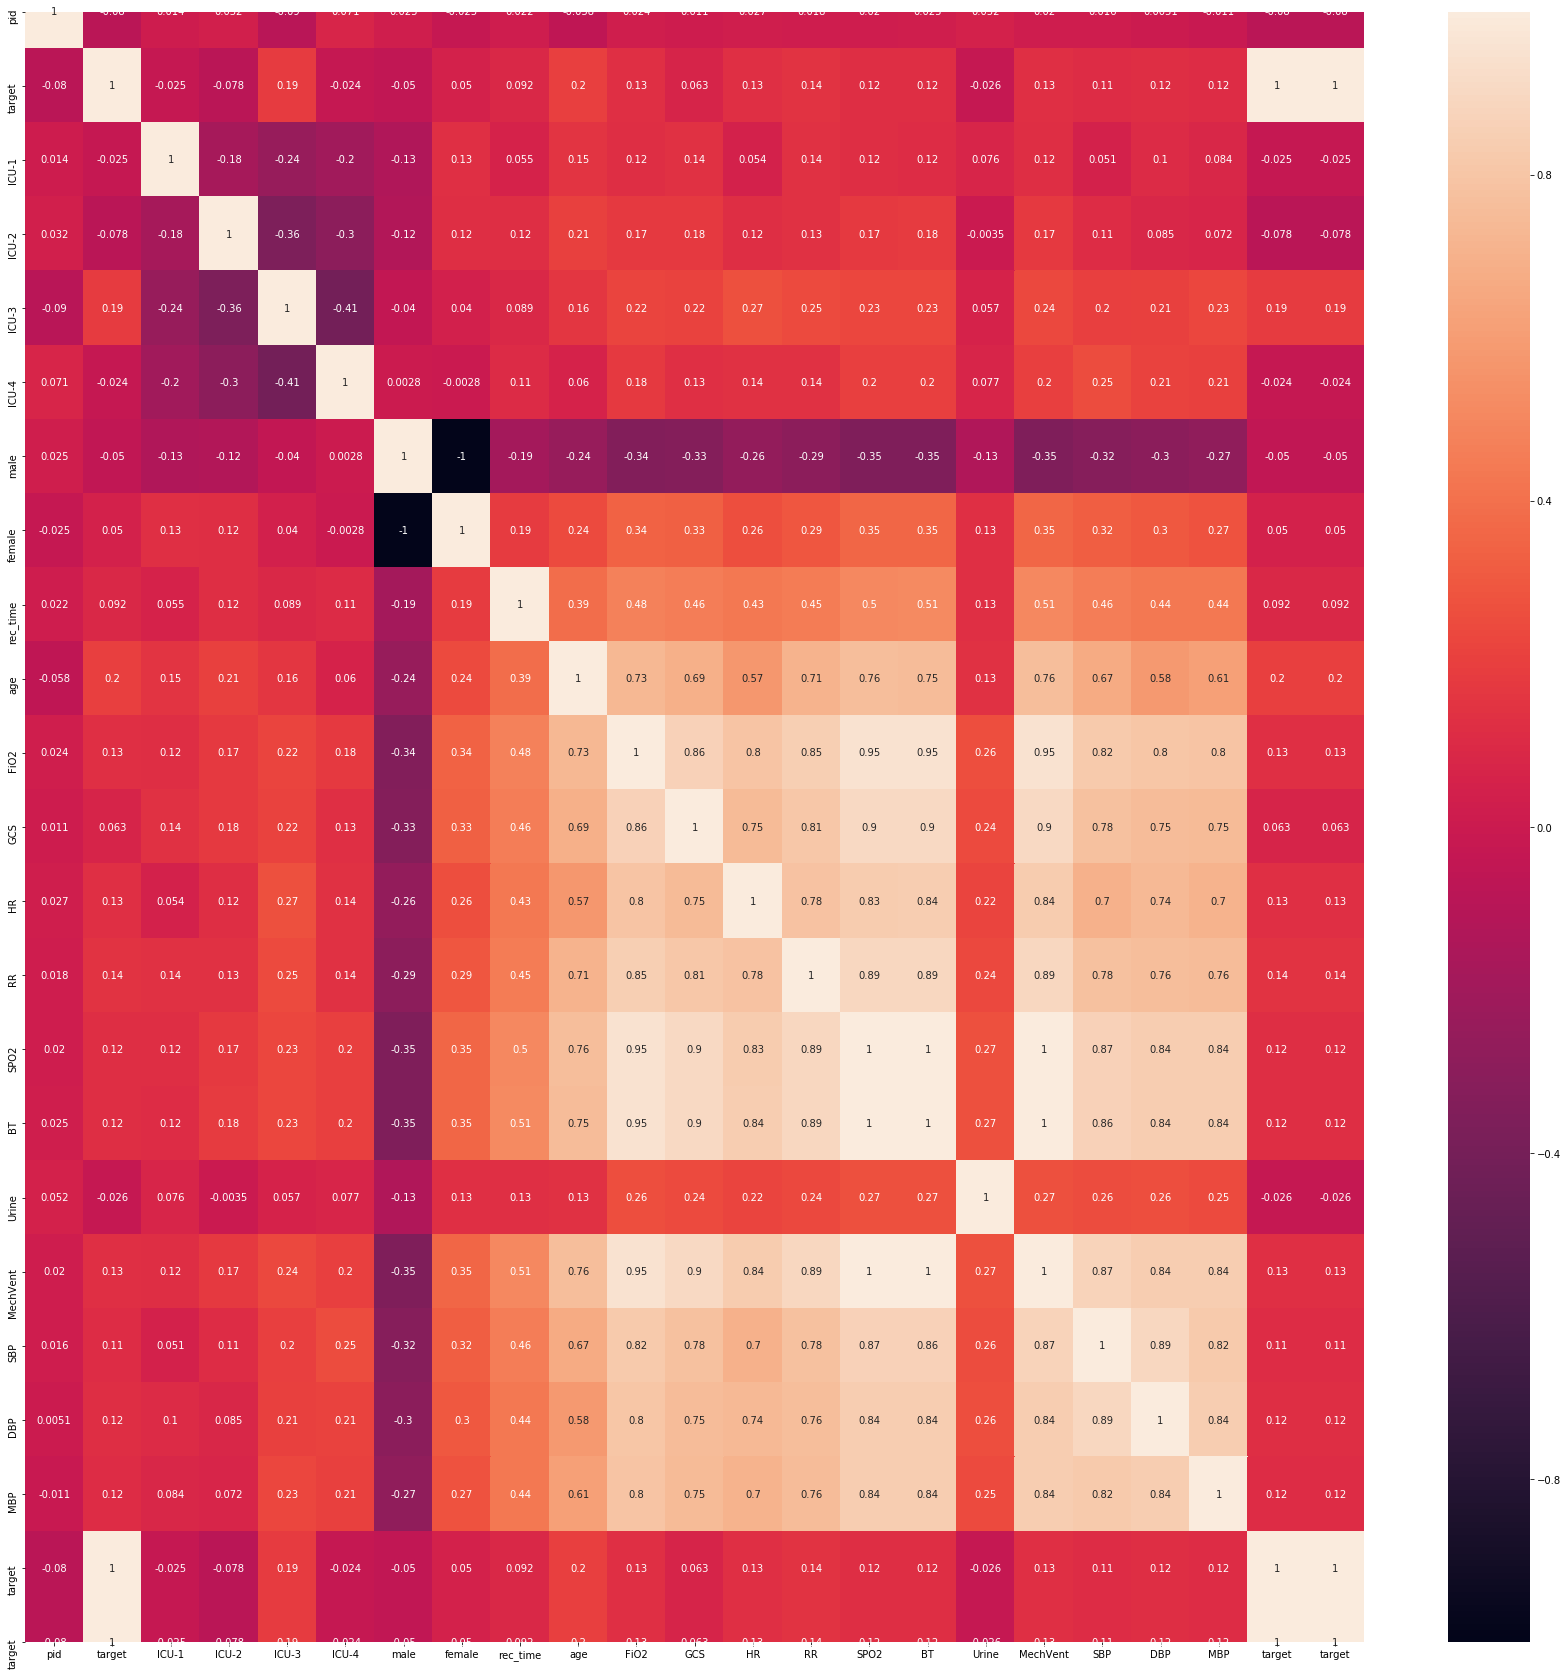

In [48]:
# test
plt.figure(figsize=(30,30))
sns.heatmap(df5.corr(), annot=True)

In [6]:
df = test_df

In [261]:
print(train_X.shape, train_y.shape)
print(valid_X.shape, valid_y.shape)
print(test_X.shape, test_y.shape)

(224980, 21) (224980,)
(25060, 21) (25060,)
(27790, 21) (27790,)


In [262]:
maxlen = 70
feature_dim = train_X.shape[1]

In [263]:
train_X_arr = train_X.to_numpy()
test_X_arr = test_X.to_numpy()
valid_X_arr = valid_X.to_numpy()

In [264]:
train_X_3d = train_X_arr.reshape(-1, maxlen, feature_dim)
test_X_3d = test_X_arr.reshape(-1, maxlen, feature_dim)
valid_X_3d = valid_X_arr.reshape(-1, maxlen, feature_dim)

In [265]:
def make_y_value(df):
    y_real = pd.DataFrame()
    for i in range(len(df['pid'].unique())):
        i = (i+1)*70-1                          # 70번째마다의 행만 작업
        y_each = pd.DataFrame(df.iloc[i,:])     # output = 시리즈형태
        y_each = y_each.transpose()             # 시리즈형태이므로 1열로 나오는 것을 1행으로 변경
        y_real = pd.concat([y_real, y_each])
    y_real.reset_index(drop=True, inplace=True)
    y_real = y_real['target']
    
    return y_real

In [266]:
train_y_real = make_y_value(train_df)
test_y_real = make_y_value(test_df)
valid_y_real = make_y_value(valid_df)

In [267]:
train_y = train_y_real
test_y = test_y_real 
valid_y = valid_y_real

In [268]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [269]:
import tensorflow

In [270]:
model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape=(70*feature_dim,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [271]:
# tensorflow.keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [272]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['acc'])

In [273]:
train_X_3d = train_X_3d.reshape([train_X_3d.shape[0], -1])
valid_X_3d = valid_X_3d.reshape([valid_X_3d.shape[0], -1])
test_X_3d = test_X_3d.reshape([test_X_3d.shape[0], -1])

In [274]:
train_X_3d.shape

(3214, 1470)

In [275]:
train_y.shape

(3214,)

In [276]:
history = model.fit(train_X_3d,train_y, epochs=10, batch_size=70, validation_data = (valid_X_3d,valid_y))

Epoch 1/10
46/46 [==============================] - 0s 7ms/step - loss: 2876.4683 - acc: 0.7688 - val_loss: 684.5853 - val_acc: 0.8631
Epoch 2/10
46/46 [==============================] - 0s 3ms/step - loss: 594.7763 - acc: 0.7750 - val_loss: 1185.5449 - val_acc: 0.1369
Epoch 3/10
46/46 [==============================] - 0s 3ms/step - loss: 637.6234 - acc: 0.7495 - val_loss: 569.8226 - val_acc: 0.8631
Epoch 4/10
46/46 [==============================] - 0s 3ms/step - loss: 325.5404 - acc: 0.7887 - val_loss: 253.2990 - val_acc: 0.8631
Epoch 5/10
46/46 [==============================] - 0s 3ms/step - loss: 528.5815 - acc: 0.7651 - val_loss: 467.4703 - val_acc: 0.8631
Epoch 6/10
46/46 [==============================] - 0s 3ms/step - loss: 151.7875 - acc: 0.7645 - val_loss: 54.6859 - val_acc: 0.8631
Epoch 7/10
46/46 [==============================] - 0s 2ms/step - loss: 250.5427 - acc: 0.7502 - val_loss: 493.0321 - val_acc: 0.8631
Epoch 8/10
46/46 [==============================] - 0s 3ms/st

In [277]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn import metrics

In [278]:
pred_y = model.predict(test_X_3d)

In [283]:
pd.DataFrame(pred_y).value_counts()

0.0    397
dtype: int64

In [185]:
fpr, tpr, thresholds = roc_curve(test_y, pred_y)

In [284]:
auroc_score = metrics.roc_auc_score(test_y, pred_y)

In [187]:
print(auroc_score)
print(auc(fpr, tpr))

0.5
0.5


In [43]:
import matplotlib.pyplot as plt

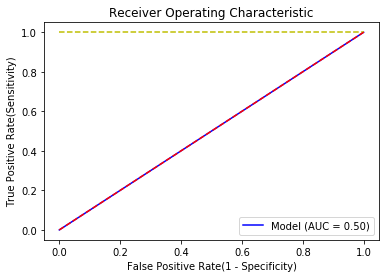

In [44]:
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')

plt.plot(fpr, tpr, 'b', label='Model (AUC = %0.2f)'% roc_auc)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

plt.legend(loc='lower right')
plt.show()

In [ ]:
# test_y_list = []
# for pid in test_df['pid'].unique():
#     test_y_list.append(test_df[test_df['pid']== pid]['target'].values[0])